In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


In [92]:
import matplotlib.pyplot as plt

In [93]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 25
CHANNELS = 3

In [94]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/leaf-disease-detection-dataset/dataset/train',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,  # 20% for validation
    subset='training'
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/leaf-disease-detection-dataset/dataset/train',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,  # 20% for validation
    subset='validation'
)

Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


In [96]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/leaf-disease-detection-dataset/dataset/test',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 17572 files belonging to 38 classes.


In [97]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [98]:
for image_batch, label_batch in train_ds.take(1):    # take(1) means taking the first batch
    print(image_batch.shape)
    print(label_batch.numpy())  # convert all the elements (classes) into numpy 

(32, 256, 256, 3)
[12 33 33  5 29  2  6 29  5 17 11  8 33 29 29 26  3 32 31  8 22 28 22 29
 10 31 33 17  0 35 19 29]


In [99]:
for image_batch, label_batch in train_ds.take(1):  
    print(image_batch[0])   # each image is a tensor 

tf.Tensor(
[[[ 75.  87.  49.]
  [ 79.  91.  53.]
  [ 85.  95.  58.]
  ...
  [146. 141. 147.]
  [147. 142. 148.]
  [147. 142. 148.]]

 [[ 85.  97.  59.]
  [ 87.  99.  61.]
  [ 91. 101.  64.]
  ...
  [147. 142. 148.]
  [147. 142. 148.]
  [147. 142. 148.]]

 [[ 93. 105.  67.]
  [ 94. 106.  68.]
  [ 95. 105.  68.]
  ...
  [148. 143. 149.]
  [148. 143. 149.]
  [148. 143. 149.]]

 ...

 [[124. 119. 139.]
  [124. 119. 139.]
  [124. 119. 139.]
  ...
  [ 98.  92. 104.]
  [ 96.  90. 102.]
  [ 96.  90. 102.]]

 [[123. 118. 138.]
  [123. 118. 138.]
  [122. 117. 137.]
  ...
  [ 97.  91. 103.]
  [ 97.  91. 103.]
  [ 97.  91. 103.]]

 [[122. 117. 137.]
  [122. 117. 137.]
  [122. 117. 137.]
  ...
  [ 95.  89. 101.]
  [ 95.  89. 101.]
  [ 96.  90. 102.]]], shape=(256, 256, 3), dtype=float32)


In [100]:
for image_batch, label_batch in train_ds.take(1):  
    print(image_batch[0].numpy())   # converting tensor image into numpy

[[[ 98.  97.  93.]
  [ 96.  95.  91.]
  [ 91.  90.  86.]
  ...
  [192. 196. 197.]
  [190. 194. 195.]
  [190. 194. 195.]]

 [[ 96.  95.  91.]
  [ 97.  96.  92.]
  [ 96.  95.  91.]
  ...
  [174. 178. 179.]
  [173. 177. 178.]
  [173. 177. 178.]]

 [[ 91.  90.  86.]
  [ 94.  93.  89.]
  [ 98.  97.  93.]
  ...
  [165. 169. 170.]
  [165. 169. 170.]
  [166. 170. 171.]]

 ...

 [[129. 127. 130.]
  [116. 114. 117.]
  [163. 161. 164.]
  ...
  [122. 125. 130.]
  [107. 110. 115.]
  [153. 156. 161.]]

 [[125. 123. 126.]
  [127. 125. 128.]
  [146. 144. 147.]
  ...
  [119. 122. 127.]
  [117. 120. 125.]
  [119. 122. 127.]]

 [[151. 149. 152.]
  [128. 126. 129.]
  [151. 149. 152.]
  ...
  [120. 123. 128.]
  [120. 123. 128.]
  [135. 138. 143.]]]


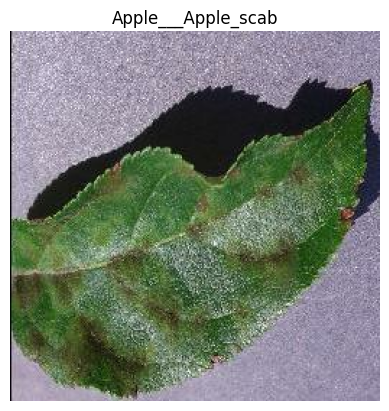

In [101]:
# printing the first image using matplotlib.pyplot
for image_batch, label_batch in train_ds.take(1):  
    plt.imshow(image_batch[0].numpy().astype("uint8")) 
    plt.title(class_names[label_batch[0]])
    plt.axis("off") 

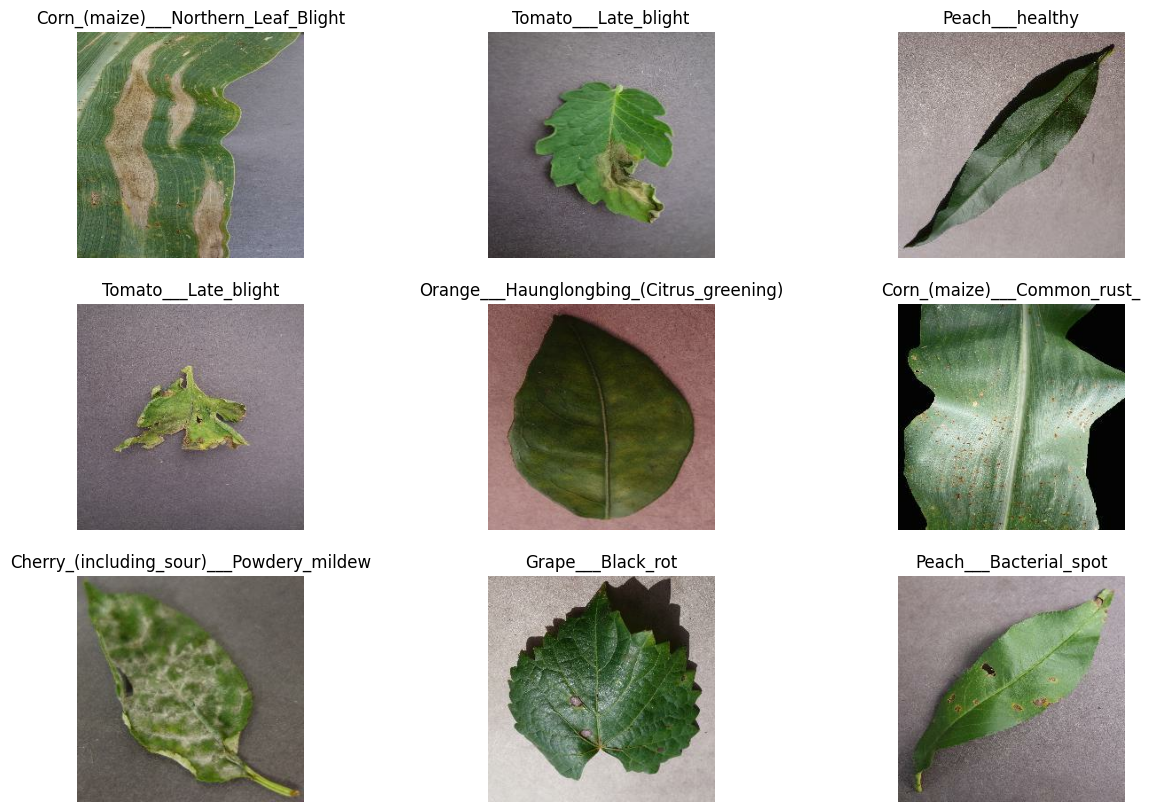

In [102]:
# Visualize some training images
plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, BATCH_SIZE)):  # Ensure not to exceed BATCH_SIZE
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [103]:
# Data augmentation and preprocessing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [107]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1)
])


In [108]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE ,CHANNELS)
n_classes = len(class_names)

In [110]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (32, 255, 255, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (32, 126, 126, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (32, 63, 63, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (32, 62, 62, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (32, 31, 31, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (32, 30, 30, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (32, 15, 15, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (32, 14, 14, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (32, 6, 6, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (32, 3, 3, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 576)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 128)              │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 38)               │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,222 (598.52 KB)

 Trainable params: 153,222 (598.52 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [113]:
# Training the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.3701 - loss: 2.2364 - val_accuracy: 0.7591 - val_loss: 0.7558
Epoch 2/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.8122 - loss: 0.5988 - val_accuracy: 0.8804 - val_loss: 0.3644
Epoch 3/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.8853 - loss: 0.3553 - val_accuracy: 0.8893 - val_loss: 0.3428
Epoch 4/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9104 - loss: 0.2707 - val_accuracy: 0.9060 - val_loss: 0.2961
Epoch 5/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9272 - loss: 0.2142 - val_accuracy: 0.9187 - val_loss: 0.2559
Epoch 6/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9421 - loss: 0.1772 - val_accuracy: 0.9314 - val_loss: 0.2174
Epoch 7/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9467 - loss: 0.1575 - val_accuracy: 0.9035 - val_loss: 0.3271
Epoch 8/25
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9545 -

In [116]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9501 - loss: 0.2181
Test accuracy: 0.9504894018173218


In [117]:
scores = model.evaluate(test_ds)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9500 - loss: 0.2191


In [118]:
scores

[0.2025182992219925, 0.9504894018173218]

In [119]:
history

In [120]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [121]:
history.history['accuracy']


[0.5680524706840515,
 0.8333629965782166,
 0.889785885810852,
 0.9143431186676025,
 0.9307027459144592,
 0.9418343901634216,
 0.9486449956893921,
 0.9563446640968323,
 0.9583896398544312,
 0.9625328779220581,
 0.9661782383918762,
 0.968561053276062,
 0.9715840220451355,
 0.9712284207344055,
 0.9739846587181091,
 0.9752649664878845,
 0.9771498441696167,
 0.9759051203727722,
 0.9769720435142517,
 0.9779145121574402,
 0.9781456589698792,
 0.9807240962982178,
 0.9813286662101746,
 0.9803329110145569,
 0.9807596802711487]

In [126]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

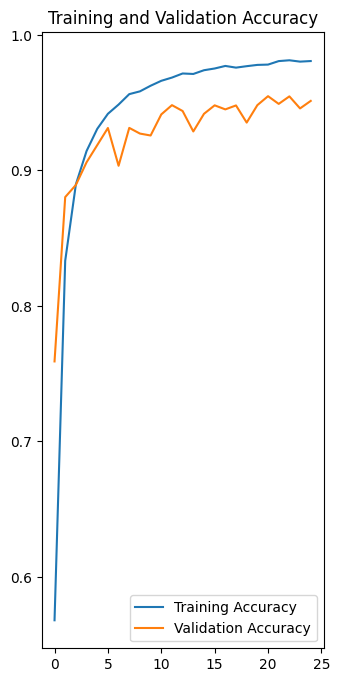

In [127]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25), acc, label='Training Accuracy') # 25 is epochs
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
[9.99985695e-01 1.78534433e-12 1.21213178e-10 2.95913210e-17
 2.55338389e-10 2.58764449e-14 1.74501369e-25 1.12471712e-08
 6.28228936e-09 3.87312117e-14 1.75741816e-26 7.04878205e-23
 6.19296104e-18 2.38668068e-32 3.89641146e-28 3.58512070e-29
 1.07861995e-08 1.45171094e-22 7.69270758e-11 5.83672909e-19
 4.69049938e-11 8.62126181e-18 6.23981704e-26 2.86152976e-26
 9.06721193e-27 4.49566466e-23 1.04118665e-10 1.61014361e-22
 1.69705628e-19 2.32509622e-13 3.35501453e-11 3.45471243e-08
 1.42942381e-05 2.69278319e-29 2.16977359e-19 8.24712166e-30
 8.80322928e-22 9.40546867e-24]
predicted label: Apple___Apple_scab


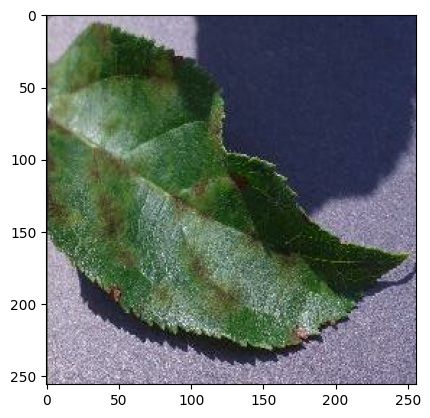

In [128]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [130]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)    # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]    # Predicting the class
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


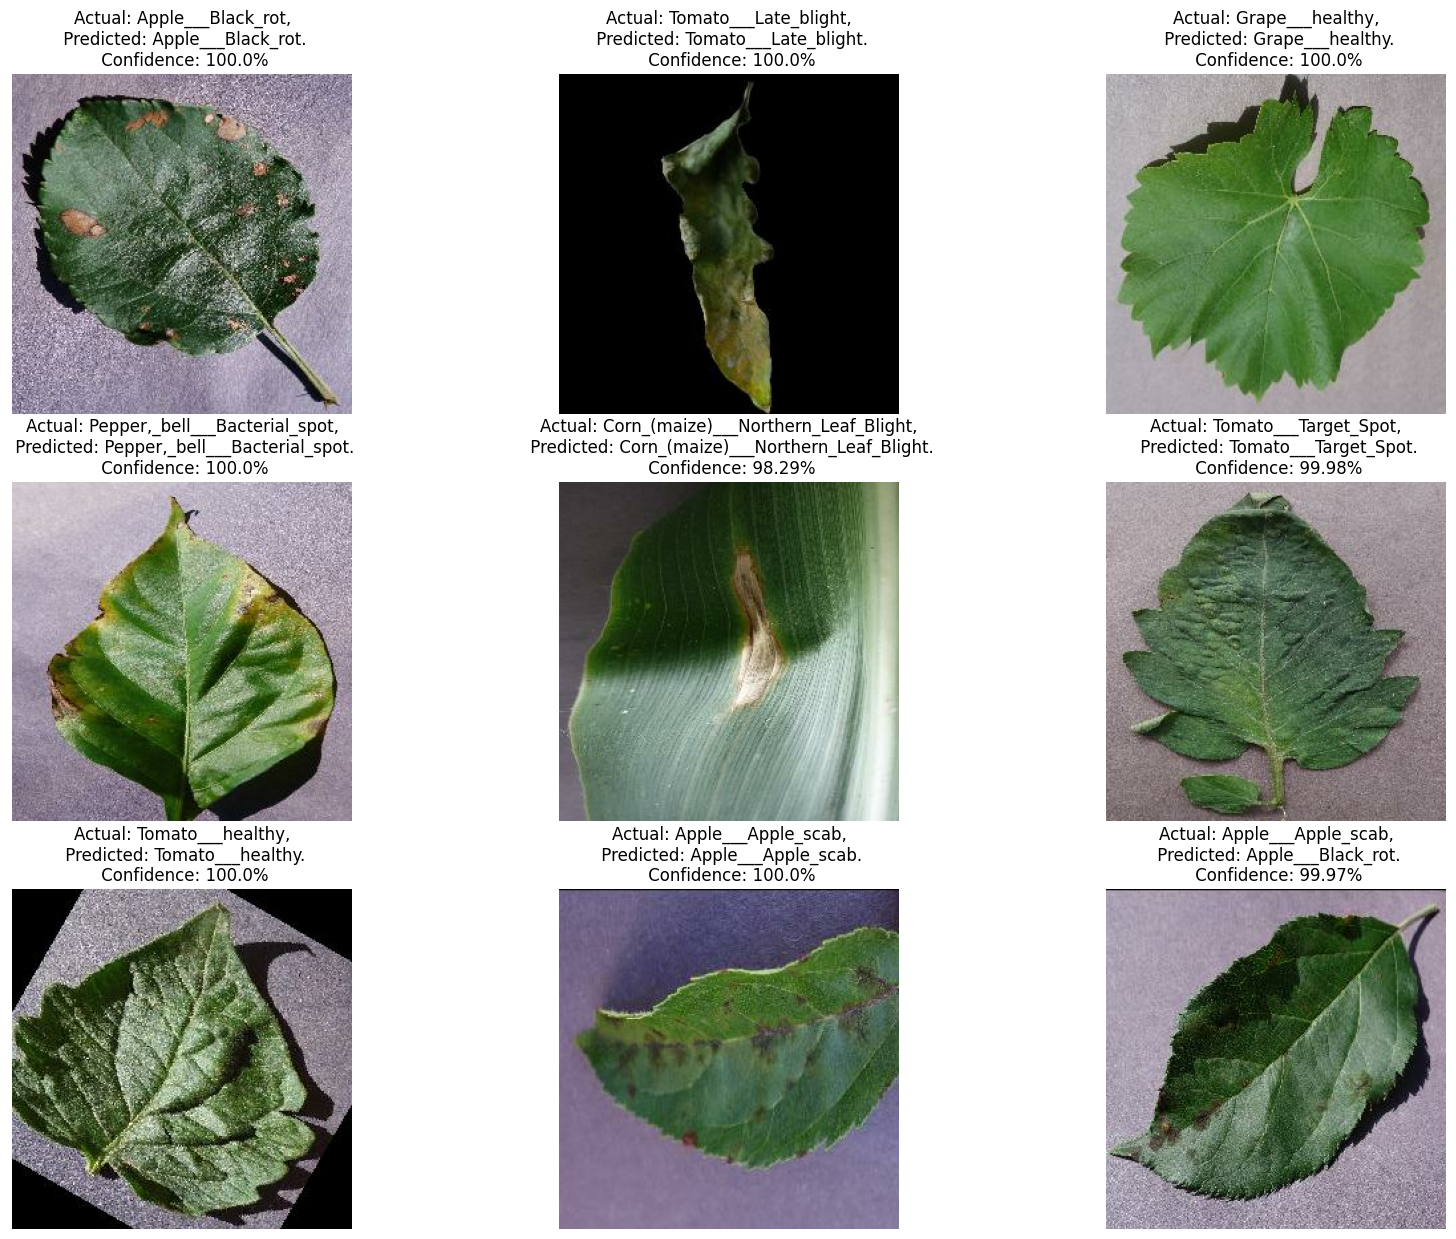

In [131]:
# Running my prediction on the entire batch
plt.figure(figsize=(20,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [3]:
import os

# Get the highest model version number from the filenames
model_version = max(
    [int(i.split('.')[0]) for i in os.listdir("models/") if i.endswith('.keras')] + [0]
) + 1

# Save the model with the new version number
model.save(f"models/{model_version}.keras")
